In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [ ]:
from google.colab import files
import os
import pandas as pd

df = pd.read_csv(file_path)
# Specify the expected file path
file_path = "/content/Car_Insurance_Claim.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found at {file_path}. Please upload the file.")
    uploaded = files.upload()
    if uploaded:
        # Assuming the user uploads a file with the correct name
        # If the uploaded file has a different name, you'll need to adjust file_path
        print("File uploaded successfully. Attempting to read again.")
    else:
        print("No file uploaded. Please upload the CSV file to proceed.")
        # Exit or handle the case where no file is uploaded
        # For now, we'll continue, which will likely lead to another FileNotFoundError
        # if the file wasn't already there and wasn't uploaded.

import pandas as pd
# Try reading the file again
try:
    df = pd.read_csv(file_path)


In [ ]:
df.head(10)



,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
# Clean and normalize columns
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Drop ID if exists
df.drop(columns=['id'], errors='ignore', inplace=True)

# Handle missing values safely
if 'credit_score' in df.columns:
    df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())

if 'annual_mileage' in df.columns:
    df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].median())

# Filter only existing categorical columns before encoding
categorical_candidates = ['gender', 'race', 'education', 'vehicle_type', 'marital_status']
categorical_cols = [col for col in categorical_candidates if col in df.columns]

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numeric features
scaler = StandardScaler()
for col in ['credit_score', 'annual_mileage']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])




In [ ]:
#  Feature Engineering with cleaned column names
# Only create features if the columns exist
if 'speeding_violations' in df.columns and 'annual_mileage' in df.columns:
    df['violations_per_mile'] = df['speeding_violations'] / (df['annual_mileage'] + 1)

if 'credit_score' in df.columns:
    df['risk_tier'] = pd.qcut(df['credit_score'], 4, labels=False)



In [ ]:
# Confirm cleaned column names
print(df.columns)

# Identify the correct target column
target_col = 'outcome'  # cleaned version of 'Outcome'

# Ensure it exists
if target_col not in df.columns:
    raise ValueError(f"Expected column '{target_col}' not found in DataFrame.")

# Define features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Index(['age', 'driving_experience', 'income', 'credit_score', 'vehicle_ownership', 'vehicle_year', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome', 'gender_male', 'race_minority', 'education_none', 'education_university', 'vehicle_type_sports car', 'violations_per_mile', 'risk_tier'], dtype='object')


In [ ]:
df.head(10)

,age,driving_experience,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome,gender_male,race_minority,education_none,education_university,vehicle_type_sports car,violations_per_mile,risk_tier
0,65+,0-9y,upper class,0.858800,1.0,after 2015,0.0,1.0,10238,0.102181,0,0,0,0.0,False,False,False,False,False,0.000000,3
1,16-25,0-9y,poverty,-1.215536,0.0,before 2015,0.0,0.0,10238,1.593875,0,0,0,1.0,True,False,True,False,False,0.000000,0
2,16-25,0-9y,working class,-0.180252,1.0,before 2015,0.0,0.0,10238,-0.270742,0,0,0,0.0,False,False,False,False,False,0.000000,1
3,16-25,0-9y,working class,-2.375887,1.0,before 2015,0.0,1.0,32765,-0.270742,0,0,0,0.0,True,False,False,True,False,0.000000,0
4,26-39,10-19y,working class,-0.981478,1.0,before 2015,0.0,0.0,32765,0.102181,2,0,1,1.0,True,False,True,False,False,1.814584,0
5,40-64,20-29y,upper class,0.783097,1.0,after 2015,0.0,1.0,10238,0.475105,3,0,3,0.0,False,False,False,False,False,2.033754,3
6,65+,30y+,upper class,-0.181799,0.0,after 2015,1.0,1.0,10238,0.475105,7,0,3,0.0,True,False,False,False,False,4.745426,1
7,26-39,0-9y,working class,-0.367265,0.0,after 2015,0.0,1.0,10238,0.848028,0,0,0,1.0,False,False,False,True,False,0.000000,1
8,40-64,20-29y,working class,0.038973,0.0,before 2015,1.0,0.0,10238,0.475105,0,0,0,0.0,False,False,False,True,False,0.000000,1
9,40-64,0-9y,upper class,0.342673,1.0,before 2015,0.0,1.0,32765,-0.270742,0,0,0,1.0,False,False,False,False,False,0.000000,2


In [ ]:
#  Check for non-numeric columns
non_numeric = X.select_dtypes(include='object').columns.tolist()
print("Non-numeric columns:", non_numeric)

# One-hot encode them if needed
if non_numeric:
    X = pd.get_dummies(X, columns=non_numeric, drop_first=True)

# Re-split data after encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Non-numeric columns: ['age', 'driving_experience', 'income', 'vehicle_year']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000, solver='saga')
model.fit(X_train_scaled, y_train)




LogisticRegression(max_iter=5000, solver='saga')

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1373
         1.0       0.31      1.00      0.48       627

    accuracy                           0.31      2000
   macro avg       0.16      0.50      0.24      2000
weighted avg       0.10      0.31      0.15      2000

ROC AUC Score: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr

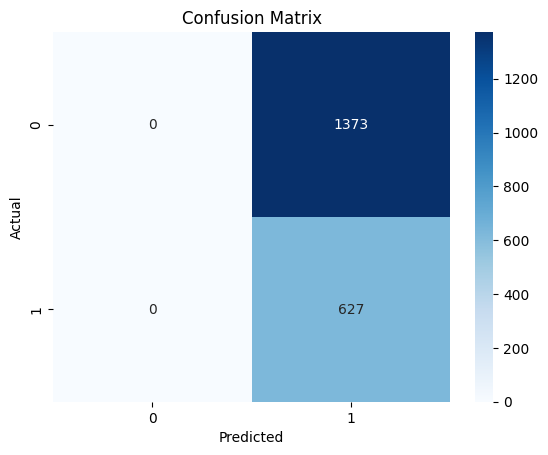

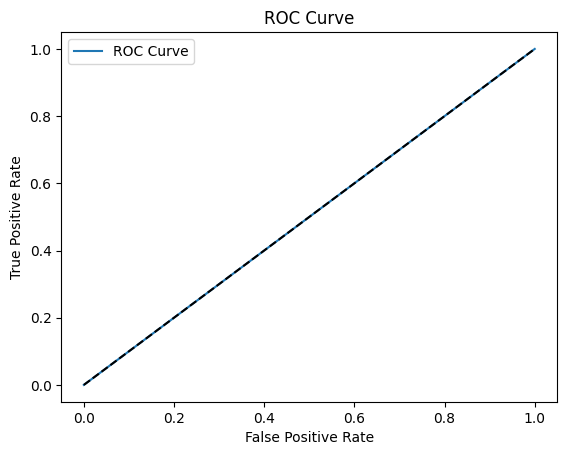

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Predict values
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1373
         1.0       0.31      1.00      0.48       627

    accuracy                           0.31      2000
   macro avg       0.16      0.50      0.24      2000
weighted avg       0.10      0.31      0.15      2000

ROC AUC Score: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr

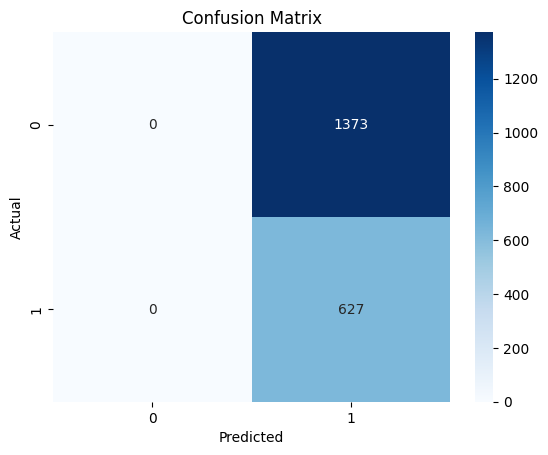

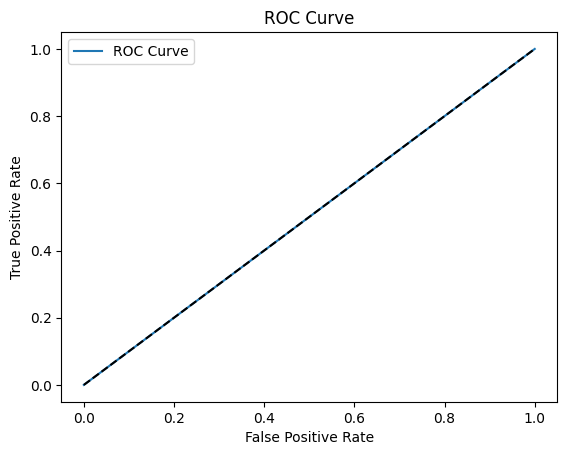

In [ ]:

plt.show()


,age,driving_experience,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome,gender_male,race_minority,education_none,education_university,vehicle_type_sports car,violations_per_mile,risk_tier
0,65+,0-9y,upper class,0.858800,1.0,after 2015,0.0,1.0,10238,0.102181,0,0,0,0.0,False,False,False,False,False,0.000000,3
1,16-25,0-9y,poverty,-1.215536,0.0,before 2015,0.0,0.0,10238,1.593875,0,0,0,1.0,True,False,True,False,False,0.000000,0
2,16-25,0-9y,working class,-0.180252,1.0,before 2015,0.0,0.0,10238,-0.270742,0,0,0,0.0,False,False,False,False,False,0.000000,1
3,16-25,0-9y,working class,-2.375887,1.0,before 2015,0.0,1.0,32765,-0.270742,0,0,0,0.0,True,False,False,True,False,0.000000,0
4,26-39,10-19y,working class,-0.981478,1.0,before 2015,0.0,0.0,32765,0.102181,2,0,1,1.0,True,False,True,False,False,1.814584,0
5,40-64,20-29y,upper class,0.783097,1.0,after 2015,0.0,1.0,10238,0.475105,3,0,3,0.0,False,False,False,False,False,2.033754,3
6,65+,30y+,upper class,-0.181799,0.0,after 2015,1.0,1.0,10238,0.475105,7,0,3,0.0,True,False,False,False,False,4.745426,1
7,26-39,0-9y,working class,-0.367265,0.0,after 2015,0.0,1.0,10238,0.848028,0,0,0,1.0,False,False,False,True,False,0.000000,1
8,40-64,20-29y,working class,0.038973,0.0,before 2015,1.0,0.0,10238,0.475105,0,0,0,0.0,False,False,False,True,False,0.000000,1
9,40-64,0-9y,upper class,0.342673,1.0,before 2015,0.0,1.0,32765,-0.270742,0,0,0,1.0,False,False,False,False,False,0.000000,2
